
# **<center>Aprendizagem de Máquina**
### <center> Algoritmo Kmeans 

Usando o algoritmo kmeans para agrupar os 8 seguintes exemplos em 3 clusters:

    A1 = (2,10), A2 = (2,5), A3 = (8,4), A4 = (5,8), A5 = (7,5), A6 = (6,4), A7 = (1,2), A8 = (4,9)

Suponha-se que as sementes iniciais (centros de cada grupo), são: A1, A4 e A7. 



#### Importação das Bibiotecas Utilizadas

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#### Declaração dos pontos na forma de numpy.array

In [0]:
a = np.array([[2, 10], [2, 5], [8, 4], [5, 8],[7, 5], [6, 4], [1, 2], [4, 9]])
seed = np.array([[2, 10], [5, 8], [1, 2]])

#### Funções de pipeline

In [0]:
def plot_cluster(a_array, color, title, subplot):
  plt.subplot(subplot)
  plt.scatter(a_array[:,0], a_array[:,1], c=color)
  plt.title(title)
  plt.xlabel("x") 
  plt.ylabel("y")
  plt.xlim(-1,12) 
  plt.ylim(-1,12)

In [0]:
def pipeline_clustering(features, clusters, seeds, iter):
  km = KMeans(clusters, seeds, max_iter=iter)
  model = km.fit(features)
  return model

#### Visualização do Conjunto de Dados

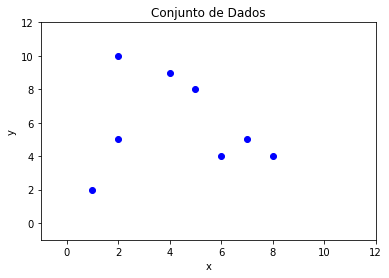

In [5]:
plot_cluster(a, 'blue', 'Conjunto de Dados', 111)

#### Determinação do número de clusters utilizando o metodo elbow
     Usando a medida de inércia que corresponde ao somatório dos erros quadráticos das instâncias de cada cluster.

In [0]:
# k means determine k
inercia = []
K = range(1,9)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(a)
    inercia.append(kmeanModel.inertia_) 

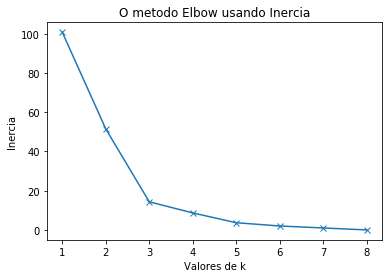

In [8]:
plt.plot(K, inercia, 'x-') 
plt.xlabel('Valores de k') 
plt.ylabel('Inercia') 
plt.title('O metodo Elbow usando Inercia') 
plt.show() 

In [10]:
a = [print(x) for x in inercia]

100.75
51.46666666666667
14.333333333333332
8.666666666666666
3.666666666666667
2.0
1.0
0.0


#### Treino do Modelo com apenas uma iteração do Algoritmo

In [14]:
km_1 = pipeline_clustering(a, 3, seed, 1)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


#### Centroides formados em uma iteração

In [15]:
centroid_1 = km_1.cluster_centers_
print("")
print("Os centróides encontrados para uma iteração foram: ")

for i, _ in enumerate(centroid_1):
  print(" {} - ".format(centroid_1[i]), end="")


Os centróides encontrados para uma iteração foram: 
 [ 2. 10.] -  [6. 6.] -  [1.5 3.5] - 

#### Visualização dos Agrupamentos e Centroides 

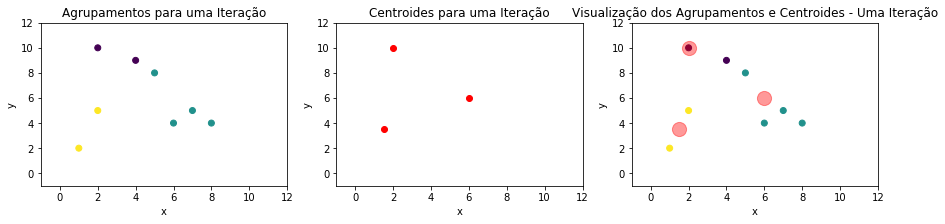

In [16]:
plt.figure(figsize=(15, 3))

plot_cluster(a, km_1.labels_, "Agrupamentos para uma Iteração", 131)

plot_cluster(centroid_1, 'red', 'Centroides para uma Iteração', 132)

plot_cluster(a, km_1.labels_, "Visualização dos Agrupamentos e Centroides - Uma Iteração", 133)
plt.scatter(centroid_1[:, 0], centroid_1[:, 1], c='red', s=200, alpha=0.4)
plt.show()

#### Treinamento do Algoritmo até a Convergencia


Parâmetros 

    n_clusters : 3
    init : ndarray (sementes inicias)
    max_iter : padrão (300)

In [17]:
km = KMeans(3, init=seed).fit(a)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


#### Centróides Formados 

In [18]:
centroid = km.cluster_centers_
iterac = km.n_iter_

print("Foram necessárias {} iterações para o algoritmo convergir.".format(iterac))
print("")
print("Os centróides encontrados foram: ")

for i, _ in enumerate(centroid):
  print(" {} - ".format(centroid[i]), end="")

Foram necessárias 4 iterações para o algoritmo convergir.

Os centróides encontrados foram: 
 [3.66666667 9.        ] -  [7.         4.33333333] -  [1.5 3.5] - 

#### Visualização dos Agrupamentos e Centróides com algoritmo Convergido

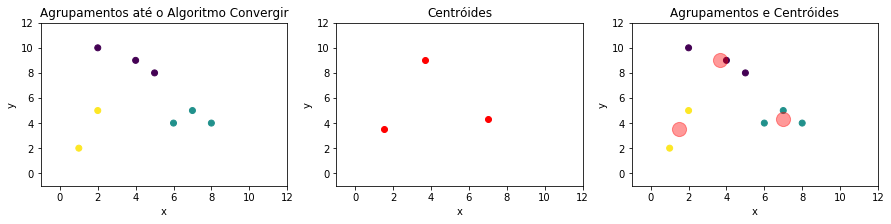

In [19]:
plt.figure(figsize=(15, 3))

plot_cluster(a, km.labels_, "Agrupamentos até o Algoritmo Convergir", 131)

plot_cluster(centroid, 'red', 'Centróides', 132)

plot_cluster(a, km.labels_, "Agrupamentos e Centróides", 133)
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', s=200, alpha=0.4)

plt.show()

#### Visualização das Regiões de Fronteira com Diagrama de Voronoi

In [0]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centroid)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


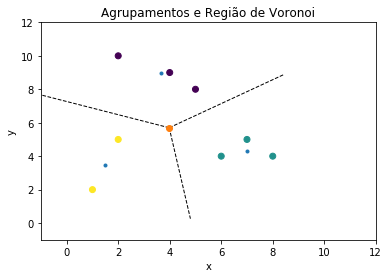

In [21]:
fig = voronoi_plot_2d(vor)
plot_cluster(a, km.labels_, "Agrupamentos e Região de Voronoi", 111)
plt.show()

Link para o Notebook: https://colab.research.google.com/drive/1oR0SZHLJTWuIslET0jKdoo8SkEO7PR09